In [1]:
STUDENT = 'Nguyễn Trần Thanh Danh - 6351071010'

# Câu a)

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Câu b)

In [3]:
print(f"Kích thước tập train: {train_images.shape} - nhãn: {train_labels.shape}")
print(f"Kích thước tập test : {test_images.shape} - nhãn: {test_labels.shape}")

Kích thước tập train: (60000, 28, 28) - nhãn: (60000,)
Kích thước tập test : (10000, 28, 28) - nhãn: (10000,)


# Câu c)

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32') / 255.0

# Câu d)

In [5]:
print(STUDENT)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Nguyễn Trần Thanh Danh - 6351071010


# Câu e)

In [6]:
print(STUDENT)
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_per_fold = []
loss_per_fold     = []
models            = []
fold_no = 1

for train_idx, val_idx in kfold.split(train_images):
    model = create_model()

    X_train_fold = train_images[train_idx]
    y_train_fold = train_labels[train_idx]
    X_val_fold   = train_images[val_idx]
    y_val_fold   = train_labels[val_idx]

    model.fit(X_train_fold, y_train_fold,
              validation_data=(X_val_fold, y_val_fold),
              epochs=5, batch_size=32, verbose=0)

    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Acc: {val_acc:.4f} - Loss: {val_loss:.4f}")

    accuracy_per_fold.append(val_acc)
    loss_per_fold.append(val_loss)
    models.append(model)
    fold_no += 1

Nguyễn Trần Thanh Danh - 6351071010


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Acc: 0.9775 - Loss: 0.0753
Fold 2 - Acc: 0.9760 - Loss: 0.0864
Fold 3 - Acc: 0.9735 - Loss: 0.0979
Fold 4 - Acc: 0.9763 - Loss: 0.0813
Fold 5 - Acc: 0.9685 - Loss: 0.1170
Fold 6 - Acc: 0.9758 - Loss: 0.0805
Fold 7 - Acc: 0.9728 - Loss: 0.1020
Fold 8 - Acc: 0.9678 - Loss: 0.1241
Fold 9 - Acc: 0.9723 - Loss: 0.0885
Fold 10 - Acc: 0.9745 - Loss: 0.0790


# Câu f)

In [7]:
print(STUDENT)
mean_acc  = np.mean(accuracy_per_fold)
std_acc   = np.std(accuracy_per_fold)
mean_loss = np.mean(loss_per_fold)
std_loss  = np.std(loss_per_fold)

print(f"Mean Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
print(f"Mean Loss    : {mean_loss:.4f} ± {std_loss:.4f}")

Nguyễn Trần Thanh Danh - 6351071010
Mean Accuracy: 0.9735 ± 0.0031
Mean Loss    : 0.0932 ± 0.0159


# Câu g)

Nguyễn Trần Thanh Danh - 6351071010


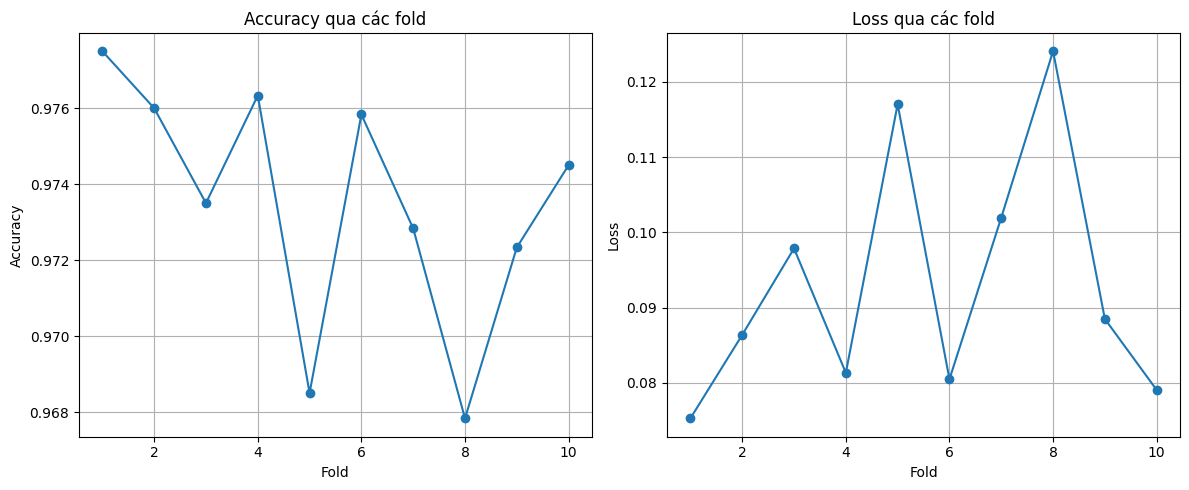

In [8]:
print(STUDENT)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1,11), accuracy_per_fold, 'o-')
plt.title('Accuracy qua các fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(1,11), loss_per_fold, 'o-')
plt.title('Loss qua các fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()
plt.show()

# Câu h)

In [9]:
print(STUDENT)
best_idx = np.argmax(accuracy_per_fold)
best_model = models[best_idx]
print(f"Mô hình tốt nhất: Fold {best_idx+1} - Accuracy: {accuracy_per_fold[best_idx]:.4f}")

Nguyễn Trần Thanh Danh - 6351071010
Mô hình tốt nhất: Fold 1 - Accuracy: 0.9775


# Câu i)

In [10]:
print(STUDENT)
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Nguyễn Trần Thanh Danh - 6351071010
Test Accuracy: 0.9749


# Câu j)

In [11]:
print(STUDENT)
from sklearn.metrics import classification_report
y_pred = np.argmax(best_model.predict(test_images, verbose=0), axis=1)
print(classification_report(test_labels, y_pred, digits=4))

Nguyễn Trần Thanh Danh - 6351071010
              precision    recall  f1-score   support

           0     0.9690    0.9898    0.9793       980
           1     0.9912    0.9930    0.9921      1135
           2     0.9842    0.9661    0.9751      1032
           3     0.9559    0.9881    0.9718      1010
           4     0.9688    0.9786    0.9737       982
           5     0.9797    0.9731    0.9764       892
           6     0.9811    0.9749    0.9780       958
           7     0.9573    0.9805    0.9688      1028
           8     0.9738    0.9548    0.9642       974
           9     0.9886    0.9475    0.9676      1009

    accuracy                         0.9749     10000
   macro avg     0.9750    0.9746    0.9747     10000
weighted avg     0.9751    0.9749    0.9749     10000



# Câu k)

Nguyễn Trần Thanh Danh - 6351071010


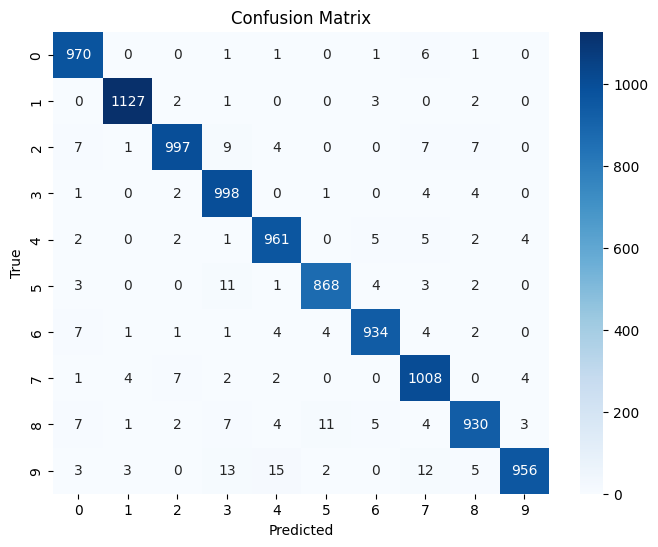

In [12]:
print(STUDENT)
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Câu l

Nguyễn Trần Thanh Danh - 6351071010


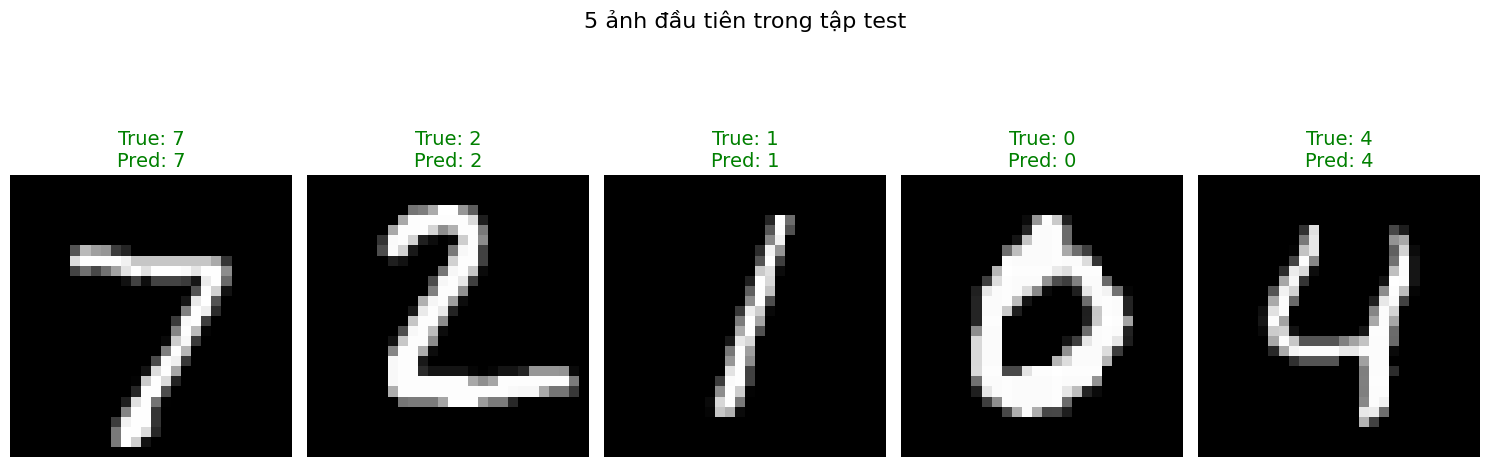

In [13]:
print(STUDENT)
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')

    img = np.expand_dims(test_images[i], axis=0)
    pred = np.argmax(best_model.predict(img, verbose=0))
    true = test_labels[i]

    color = 'green' if pred == true else 'red'
    plt.title(f"True: {true}\nPred: {pred}", color=color, fontsize=14)
    plt.axis('off')
plt.suptitle("5 ảnh đầu tiên trong tập test", fontsize=16)
plt.tight_layout()
plt.show()